In [72]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [73]:
train_df = pd.read_csv('/content/test.csv', sep=',', header=0)
test_df = pd.read_csv('/content/train.csv', sep=',', header=0)
print(train_df)

        id      date          city       lat      long     pop    shop  \
0     6480  31/01/18        Athens  37.97945  23.71622  664046  shop_1   
1     6481  31/01/18        Athens  37.97945  23.71622  664046  shop_1   
2     6482  31/01/18        Athens  37.97945  23.71622  664046  shop_1   
3     6483  31/01/18        Athens  37.97945  23.71622  664046  shop_1   
4     6484  31/01/18        Athens  37.97945  23.71622  664046  shop_1   
...    ...       ...           ...       ...       ...     ...     ...   
1075  7555  31/12/18        Athens  37.97945  23.71622  664046  shop_1   
1076  7556  31/12/18        Athens  37.97945  23.71622  664046  shop_1   
1077  7557  31/12/18         Patra  38.24444  21.73444  168034  shop_6   
1078  7558  31/12/18  Thessaloniki  40.64361  22.93086  354290  shop_4   
1079  7559  31/12/18     Irakleion  35.32787  25.14341  137154  shop_2   

             brand container capacity  price  quantity  
0      kinder-cola   plastic    1.5lt   3.10      7056

In [74]:
print(test_df)

       id      date    city       lat      long       pop    shop  \
0     0.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
1     1.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
2     2.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
3     3.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
4     4.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
...   ...       ...     ...       ...       ...       ...     ...   
7555  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7556  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7557  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7558  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7559  NaN       NaN     NaN       NaN       NaN       NaN     NaN   

            brand container capacity  price  quantity  
0     kinder-cola     glass    500ml   0.96   13280.0  
1     kinder-cola   plastic    1.5lt   2.86    6727.0  
2  

In [75]:
train_df.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691
1079,7559,31/12/18,Irakleion,35.32787,25.14341,137154,shop_2,adult-cola,glass,500ml,1.26,24615


In [76]:
test_df.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
train_df.columns

Index(['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand',
       'container', 'capacity', 'price', 'quantity'],
      dtype='object')

In [78]:
test_df.columns

Index(['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand',
       'container', 'capacity', 'price', 'quantity'],
      dtype='object')

In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1080 non-null   int64  
 1   date       1080 non-null   object 
 2   city       1080 non-null   object 
 3   lat        1072 non-null   float64
 4   long       1067 non-null   float64
 5   pop        1080 non-null   int64  
 6   shop       1080 non-null   object 
 7   brand      1080 non-null   object 
 8   container  1077 non-null   object 
 9   capacity   1076 non-null   object 
 10  price      1080 non-null   float64
 11  quantity   1080 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 101.4+ KB


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [81]:
train_df.describe()

,id,lat,long,pop,price,quantity
count,1080.00000,1072.000000,1067.000000,1080.000000,1080.000000,1080.000000
mean,7019.50000,38.298228,23.269862,355370.166667,1.238454,29360.875926
std,311.91345,1.655656,1.088977,230207.452873,0.829449,16182.538761
min,6480.00000,35.327870,21.734440,137154.000000,0.230000,3523.000000
25%,6749.75000,37.962450,22.417610,144651.000000,0.650000,17229.750000
50%,7019.50000,38.244440,22.930860,261162.000000,0.980000,26010.500000
75%,7289.25000,39.636890,23.716220,664046.000000,1.555000,37421.750000
max,7559.00000,40.643610,25.143410,664046.000000,4.790000,116612.000000


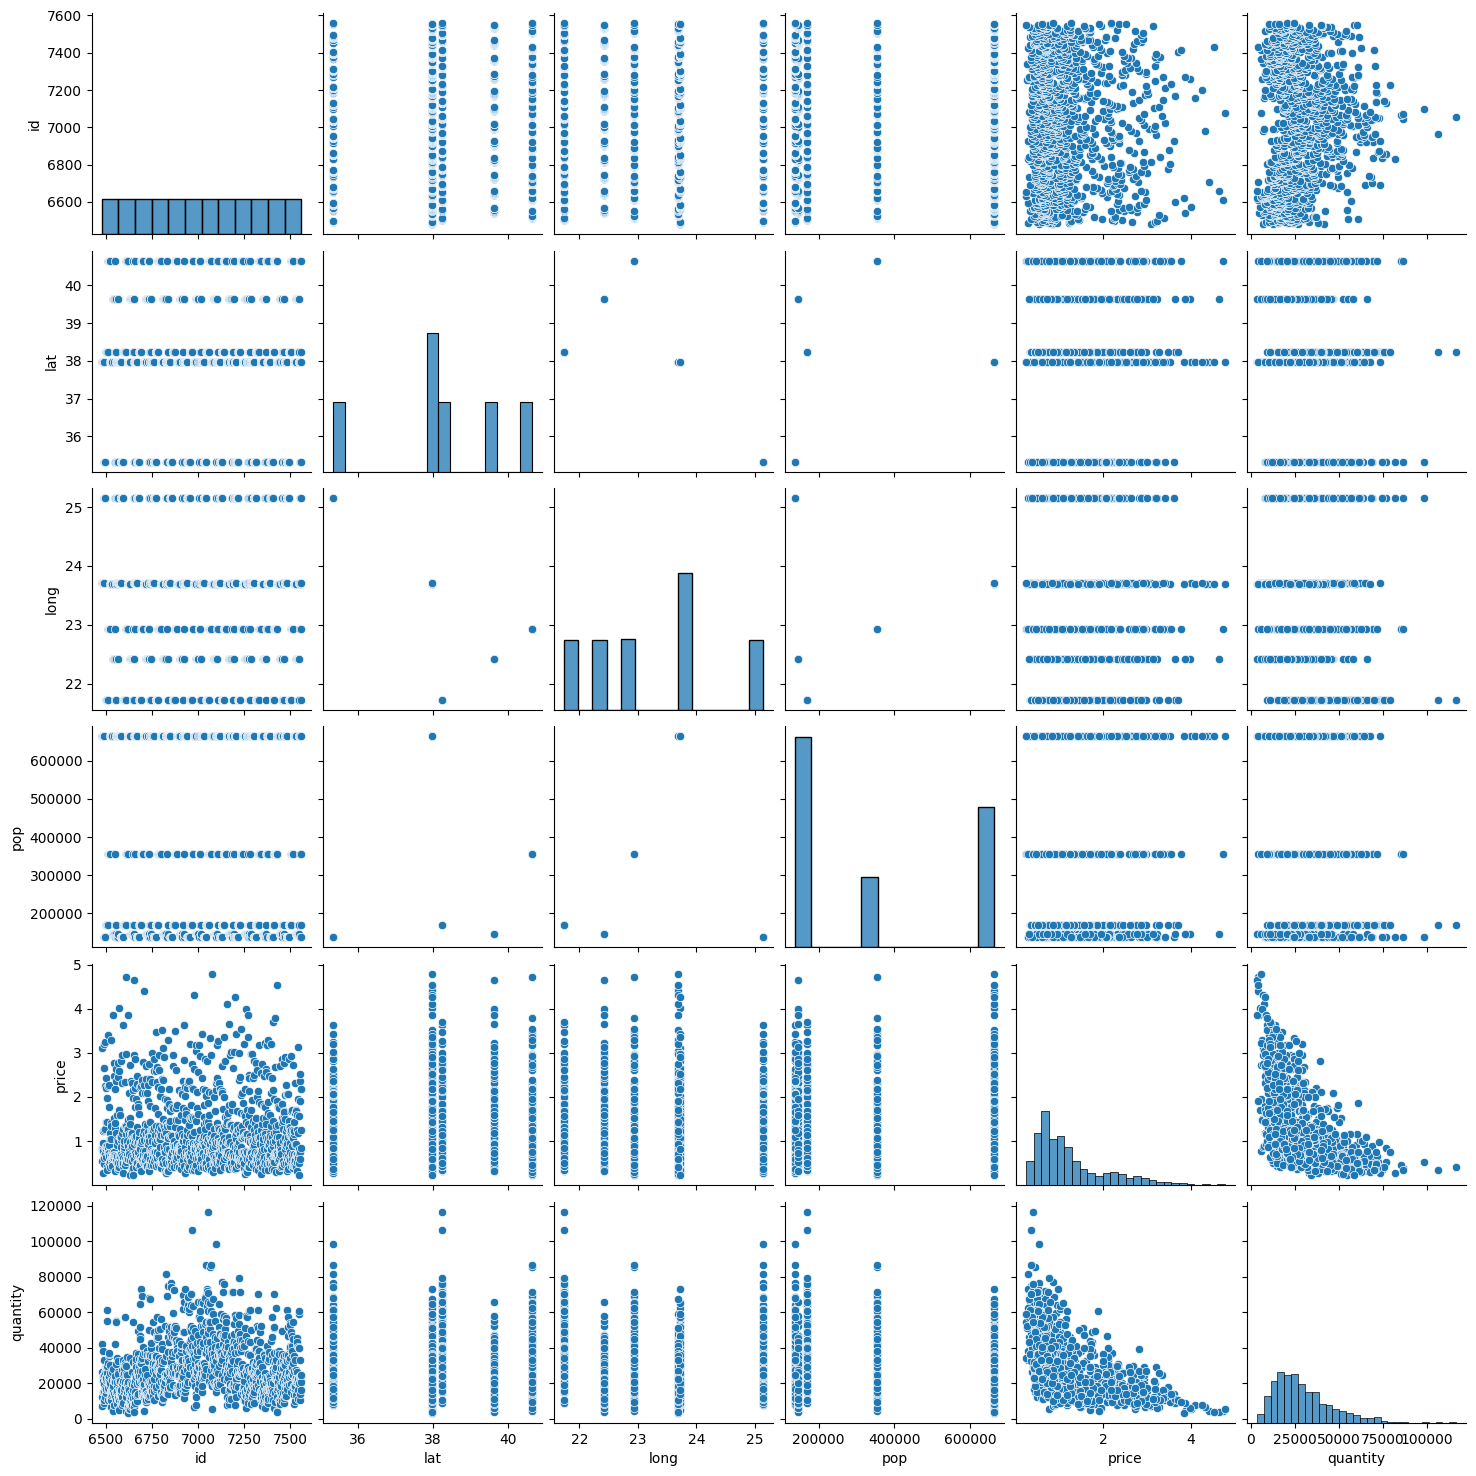

In [82]:
sns.pairplot(train_df)

In [83]:
test_df.describe()

,id,lat,long,pop,price,quantity
count,6480.000000,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1870.759204,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1619.750000,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,3239.500000,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,4859.250000,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


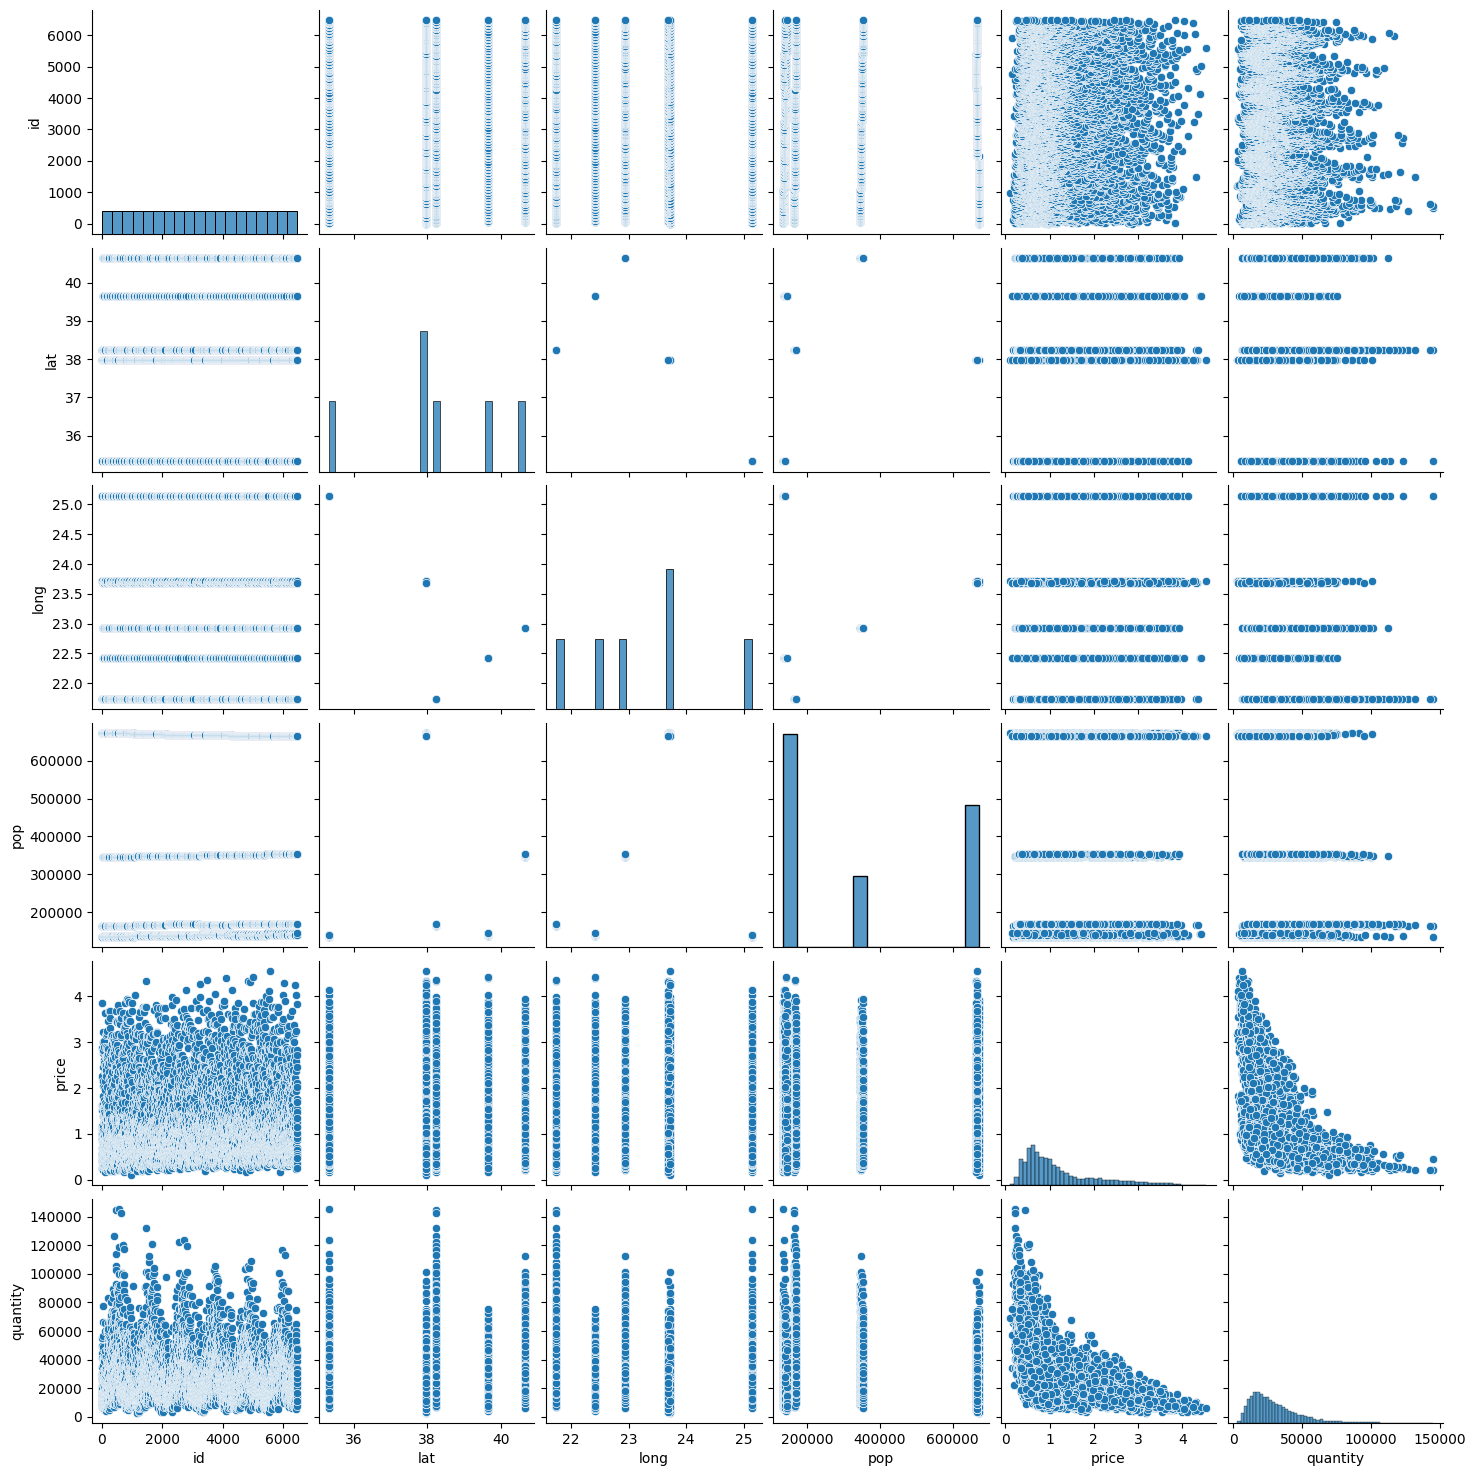

In [84]:
sns.pairplot(test_df)

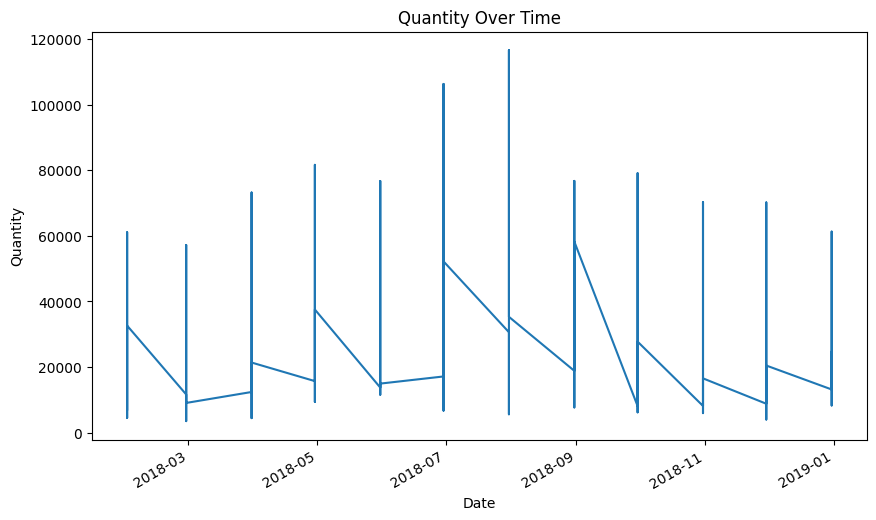

In [85]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.set_index('date', inplace=True)
train_df['quantity'].plot(figsize=(10, 6))
plt.title('Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

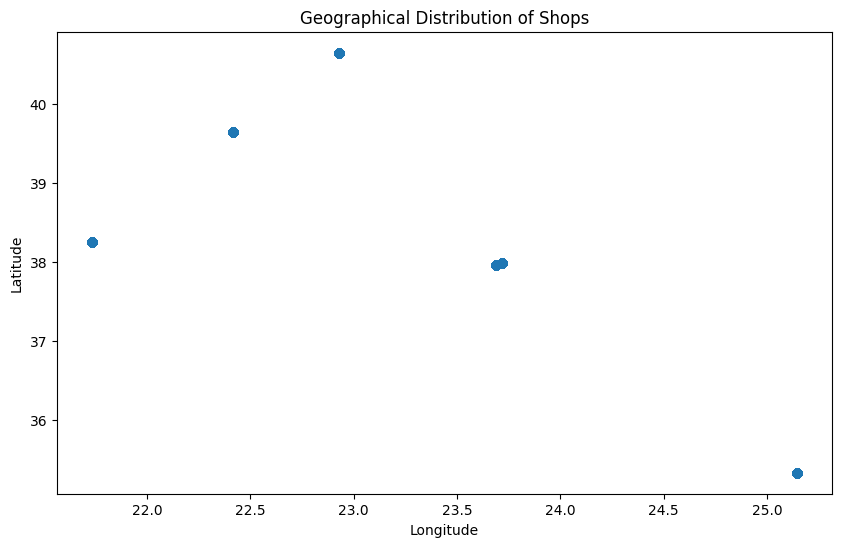

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['long'], train_df['lat'])
plt.title('Geographical Distribution of Shops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


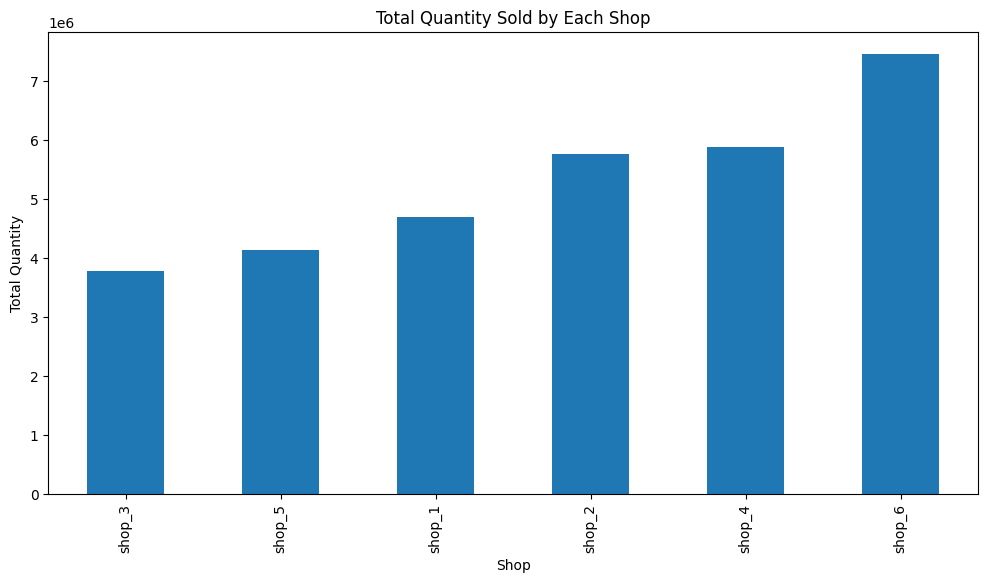

In [63]:
plt.figure(figsize=(12, 6))
train_df.groupby('shop')['quantity'].sum().sort_values().plot(kind='bar')
plt.title('Total Quantity Sold by Each Shop')
plt.xlabel('Shop')
plt.ylabel('Total Quantity')
plt.show()


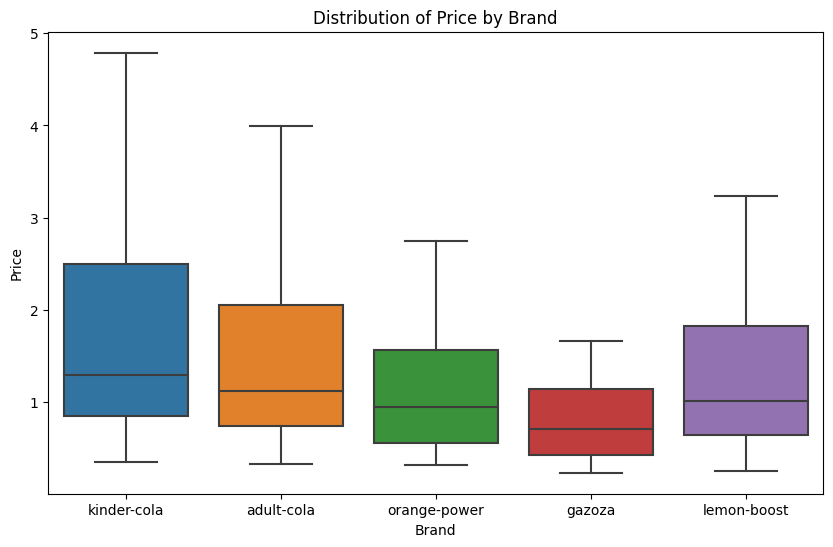

In [64]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price', data=train_df)
plt.title('Distribution of Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


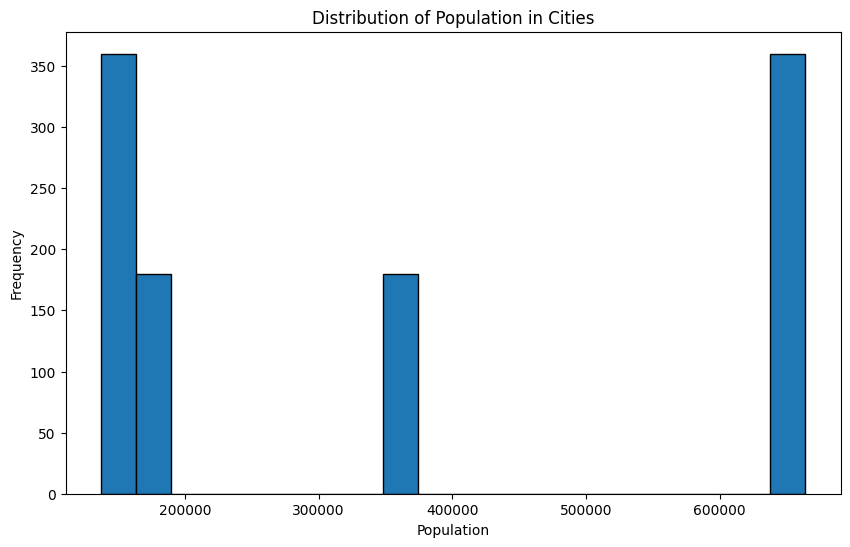

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['pop'], bins=20, edgecolor='black')
plt.title('Distribution of Population in Cities')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


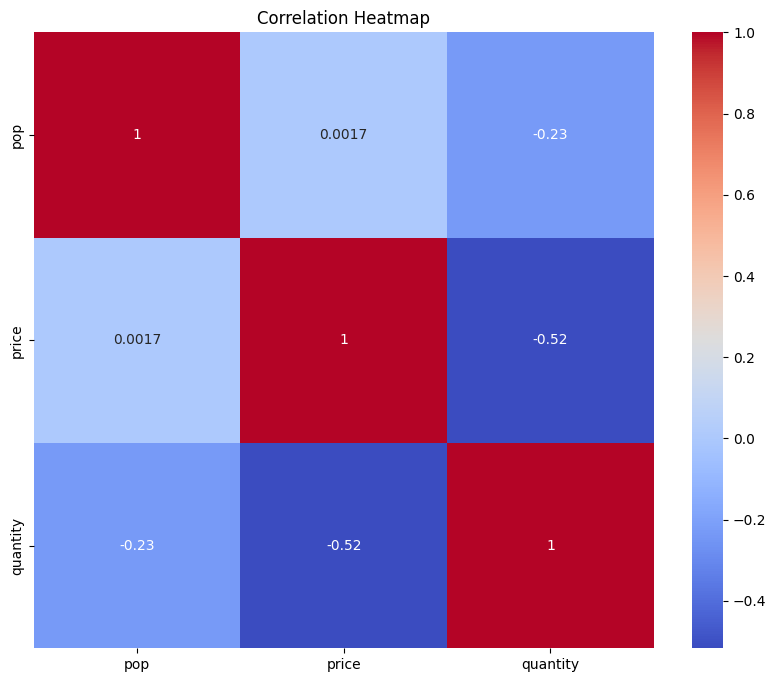

In [66]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[['pop', 'price', 'quantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

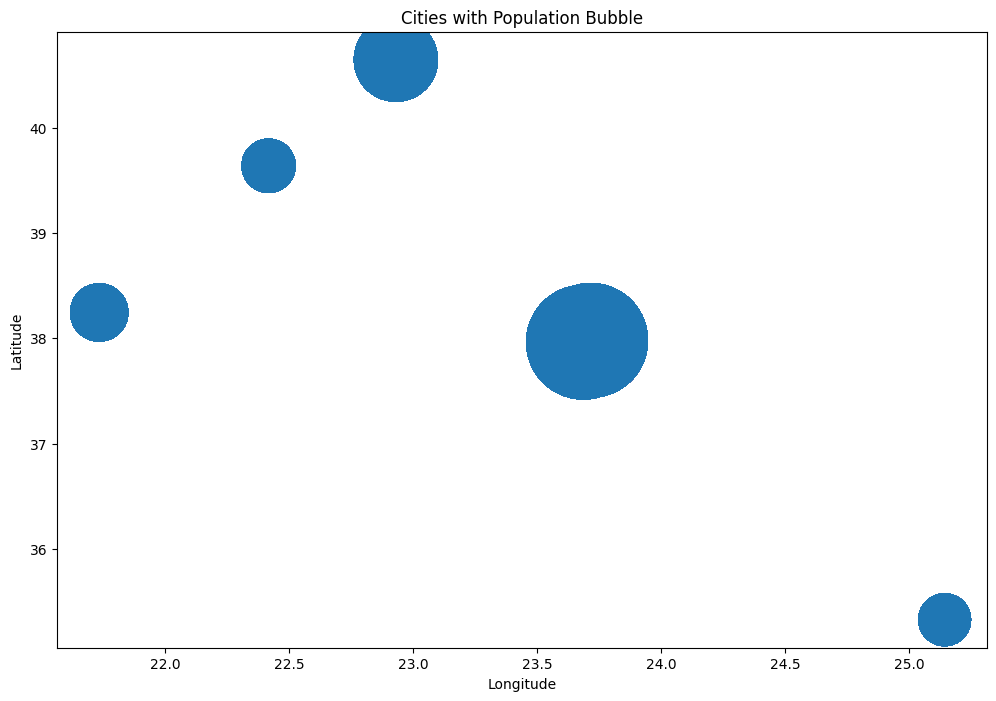

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(train_df['long'], train_df['lat'], s=train_df['pop']*0.01, alpha=0.5)
plt.title('Cities with Population Bubble')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


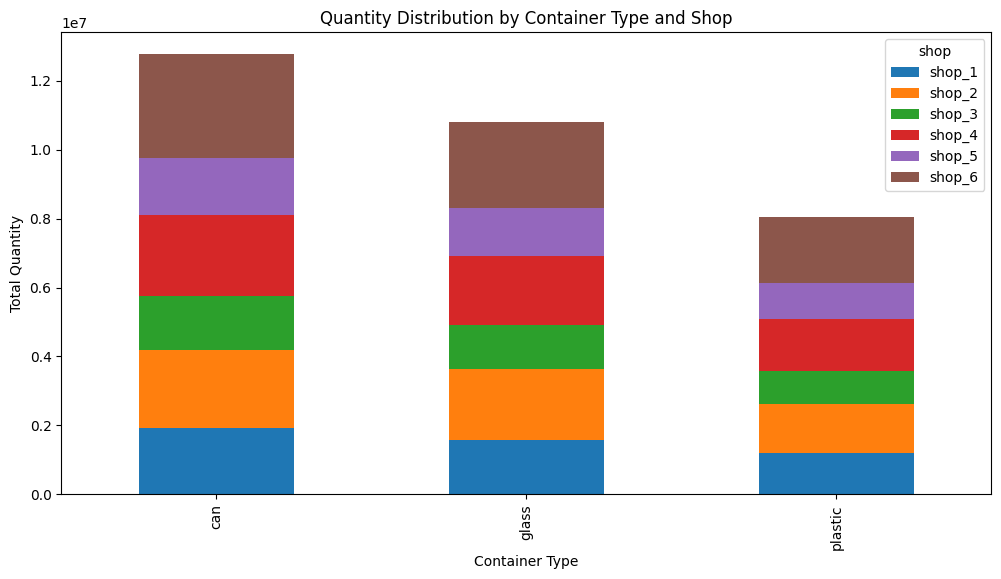

In [68]:
train_df.groupby(['container', 'shop'])['quantity'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Quantity Distribution by Container Type and Shop')
plt.xlabel('Container Type')
plt.ylabel('Total Quantity')
plt.show()


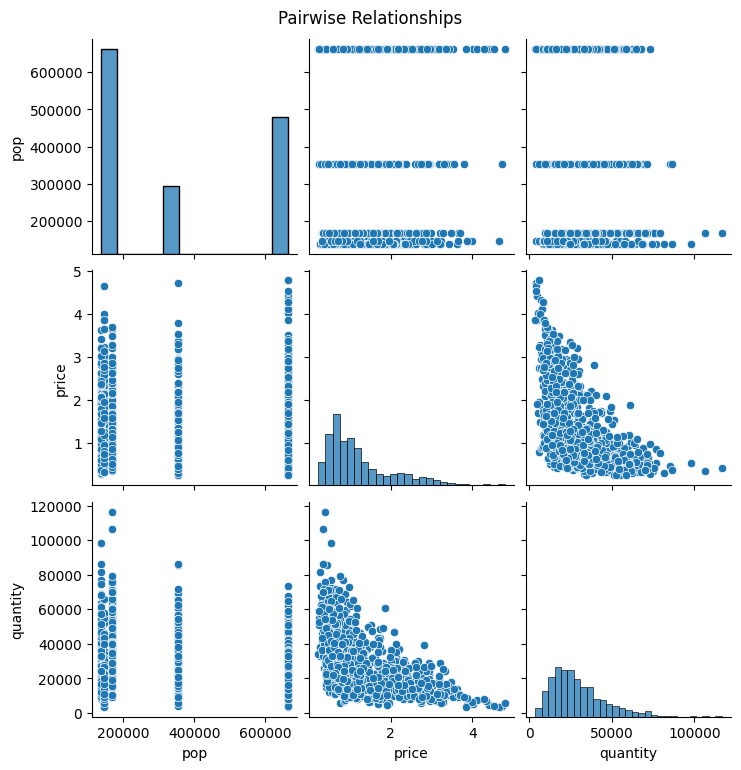

In [70]:
sns.pairplot(train_df[['pop', 'price', 'quantity']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


In [30]:
#Preprocessing

In [31]:
#splitting columns into dummies
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [32]:
#splitting date
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    df[column +'_year'] = df[column].apply(lambda x: x.year)
    df[column +'_month'] = df[column].apply(lambda x: x.month)
    df[column +'_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    return df

In [33]:
def preprocess_inputs(df):
    df = df.copy()

    #drop id column
    df=df.drop('id', axis=1)

    #remove missing rows
    missing_rows=df.loc[df.isna().all(axis=1), :].index
    df =df.drop(missing_rows, axis=0).reset_index(drop=True) #null values in lat,long,capacity, container)

    #fill numeric missing values with mean
    for column in ['lat', 'long']:
        df[column]=df[column].fillna(df[column].mean())

    #Fill ordinal missing values with mode (frequent values used to replace null values i.e 1.5lt)
    df['capacity']=df['capacity'].fillna(df['capacity'].mode()[0])

    #Ordinal encode capacity column (330=0,500=1,1.5lt=2)
    capacity_ordering = ['330ml', '500ml', '1.5lt']
    df['capacity']= df['capacity'].apply(lambda x: capacity_ordering.index(x))

    #one-hot encode nominal features (changing categorical into numerical)
    for column in ['city', 'shop', 'brand', 'container']:
        df= onehot_encode(df, column=column)

    #Extract date features (splitting day,month and year in date)
    df = encode_dates(df, column='date')

    #Split df into X and y
    y=df['quantity']
    X=df.drop('quantity', axis=1)


    return X, y

In [34]:
X_train,y_train= preprocess_inputs(train_df)
X_test,y_test= preprocess_inputs(test_df)

In [35]:
X_train

,lat,long,pop,capacity,price,city_Athens,city_Irakleion,city_Larisa,city_Patra,city_Thessaloniki,...,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power,container_can,container_glass,container_plastic,date_year,date_month,date_day
0,37.97945,23.71622,664046,2,3.10,1,0,0,0,0,...,0,1,0,0,0,0,1,2018,1,31
1,37.97945,23.71622,664046,0,0.85,1,0,0,0,0,...,0,1,0,0,1,0,0,2018,1,31
2,37.97945,23.71622,664046,1,0.83,1,0,0,0,0,...,0,0,0,0,0,1,0,2018,1,31
3,37.97945,23.71622,664046,1,0.54,1,0,0,0,0,...,0,0,0,1,0,1,0,2018,1,31
4,37.97945,23.71622,664046,2,0.83,1,0,0,0,0,...,0,0,0,1,0,0,1,2018,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,37.97945,23.71622,664046,2,2.52,1,0,0,0,0,...,0,1,0,0,0,0,1,2018,12,31
1076,37.97945,23.71622,664046,2,2.18,1,0,0,0,0,...,0,0,0,1,0,0,1,2018,12,31
1077,38.24444,21.73444,168034,0,0.85,0,0,0,1,0,...,0,1,0,0,1,0,0,2018,12,31
1078,40.64361,22.93086,354290,2,2.17,0,0,0,0,1,...,0,0,0,0,0,0,1,2018,12,31


In [36]:
y_train

0        7056
1       12490
2       26640
3       41892
4       22923
        ...  
1075    13760
1076    16309
1077    24378
1078    20691
1079    24615
Name: quantity, Length: 1080, dtype: int64

In [37]:
X_test

,lat,long,pop,capacity,price,city_Athens,city_Irakleion,city_Larisa,city_Patra,city_Thessaloniki,...,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power,container_can,container_glass,container_plastic,date_year,date_month,date_day
0,37.97945,23.71622,672130.0,1,0.96,1,0,0,0,0,...,0,1,0,0,0,1,0,2012,1,31
1,37.97945,23.71622,672130.0,2,2.86,1,0,0,0,0,...,0,1,0,0,0,0,1,2012,1,31
2,37.97945,23.71622,672130.0,0,0.87,1,0,0,0,0,...,0,1,0,0,1,0,0,2012,1,31
3,37.97945,23.71622,672130.0,1,1.00,1,0,0,0,0,...,0,0,0,0,0,1,0,2012,1,31
4,37.97945,23.71622,672130.0,0,0.39,1,0,0,0,0,...,0,0,0,0,1,0,0,2012,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,37.96245,23.68708,665871.0,2,1.02,1,0,0,0,0,...,0,0,0,1,0,0,1,2017,12,31
6476,39.63689,22.41761,144302.0,0,0.47,0,0,1,0,0,...,0,0,0,1,1,0,0,2017,12,31
6477,38.24444,21.73444,168501.0,1,1.02,0,0,0,1,0,...,0,0,0,0,0,1,0,2017,12,31
6478,40.64361,22.93086,353001.0,2,1.34,0,0,0,0,1,...,1,0,0,0,0,0,1,2017,12,31


In [38]:
y_test

0       13280.0
1        6727.0
2        9848.0
3       20050.0
4       25696.0
         ...   
6475    33201.0
6476    46971.0
6477    47708.0
6478    27115.0
6479    30413.0
Name: quantity, Length: 6480, dtype: float64

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [41]:
X_train

,lat,long,pop,capacity,price,city_Athens,city_Irakleion,city_Larisa,city_Patra,city_Thessaloniki,...,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power,container_can,container_glass,container_plastic,date_year,date_month,date_day
0,-0.193346,0.412570,1.341481,1.216281,2.245356,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,-0.705634,-0.704163,1.414214,0.0,-1.593255,0.676716
1,-0.193346,0.412570,1.341481,-1.229870,-0.468544,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,1.417165,-0.704163,-0.707107,0.0,-1.593255,0.676716
2,-0.193346,0.412570,1.341481,-0.006795,-0.492668,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,-0.5,-0.705634,1.420127,-0.707107,0.0,-1.593255,0.676716
3,-0.193346,0.412570,1.341481,-0.006795,-0.842459,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,-0.705634,1.420127,-0.707107,0.0,-1.593255,0.676716
4,-0.193346,0.412570,1.341481,1.216281,-0.492668,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,-0.705634,-0.704163,1.414214,0.0,-1.593255,0.676716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.193346,0.412570,1.341481,1.216281,1.545773,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,-0.705634,-0.704163,1.414214,0.0,1.593255,0.676716
1076,-0.193346,0.412570,1.341481,1.216281,1.135672,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,-0.705634,-0.704163,1.414214,0.0,1.593255,0.676716
1077,-0.032624,-1.419196,-0.814148,-1.229870,-0.468544,-0.707107,-0.447214,-0.447214,2.236068,-0.447214,...,-0.5,2.0,-0.5,-0.5,1.417165,-0.704163,-0.707107,0.0,1.593255,0.676716
1078,1.422527,-0.313341,-0.004694,1.216281,1.123610,-0.707107,-0.447214,-0.447214,-0.447214,2.236068,...,-0.5,-0.5,-0.5,-0.5,-0.705634,-0.704163,1.414214,0.0,1.593255,0.676716


In [42]:
X_test

,lat,long,pop,capacity,price,city_Athens,city_Irakleion,city_Larisa,city_Patra,city_Thessaloniki,...,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power,container_can,container_glass,container_plastic,date_year,date_month,date_day
0,-0.193346,0.412570,1.376613,-0.006795,-0.335865,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,-0.705634,1.420127,-0.707107,-6.0,-1.593255,0.676716
1,-0.193346,0.412570,1.376613,1.216281,1.955873,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,-0.705634,-0.704163,1.414214,-6.0,-1.593255,0.676716
2,-0.193346,0.412570,1.376613,-1.229870,-0.444421,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,1.417165,-0.704163,-0.707107,-6.0,-1.593255,0.676716
3,-0.193346,0.412570,1.376613,-0.006795,-0.287618,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,-0.5,-0.705634,1.420127,-0.707107,-6.0,-1.593255,0.676716
4,-0.193346,0.412570,1.376613,-1.229870,-1.023386,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,-0.5,1.417165,-0.704163,-0.707107,-6.0,-1.593255,0.676716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,-0.203657,0.385636,1.349412,1.216281,-0.263494,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,-0.705634,-0.704163,1.414214,-1.0,1.593255,0.676716
6476,0.811929,-0.787740,-0.917285,-1.229870,-0.926892,-0.707107,-0.447214,2.236068,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,1.417165,-0.704163,-0.707107,-1.0,1.593255,0.676716
6477,-0.032624,-1.419196,-0.812119,-0.006795,-0.263494,-0.707107,-0.447214,-0.447214,2.236068,-0.447214,...,-0.5,-0.5,-0.5,-0.5,-0.705634,1.420127,-0.707107,-1.0,1.593255,0.676716
6478,1.422527,-0.313341,-0.010296,1.216281,0.122483,-0.707107,-0.447214,-0.447214,-0.447214,2.236068,...,2.0,-0.5,-0.5,-0.5,-0.705634,-0.704163,1.414214,-1.0,1.593255,0.676716


In [43]:
X_train['capacity'].unique()

array([ 1.21628074, -1.22987047, -0.00679486])

In [44]:
['500ml', '1.5lt', '330ml'].index('1.5lt')

1

In [45]:
X_train['capacity'].mode()

0    1.216281
Name: capacity, dtype: float64

In [46]:
X_train['capacity'].mode()[0]

1.2162807418417865

In [47]:
X_train.isna().sum()

lat                   0
long                  0
pop                   0
capacity              0
price                 0
city_Athens           0
city_Irakleion        0
city_Larisa           0
city_Patra            0
city_Thessaloniki     0
shop_shop_1           0
shop_shop_2           0
shop_shop_3           0
shop_shop_4           0
shop_shop_5           0
shop_shop_6           0
brand_adult-cola      0
brand_gazoza          0
brand_kinder-cola     0
brand_lemon-boost     0
brand_orange-power    0
container_can         0
container_glass       0
container_plastic     0
date_year             0
date_month            0
date_day              0
dtype: int64

In [48]:
X_test

,lat,long,pop,capacity,price,city_Athens,city_Irakleion,city_Larisa,city_Patra,city_Thessaloniki,...,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power,container_can,container_glass,container_plastic,date_year,date_month,date_day
0,-0.193346,0.412570,1.376613,-0.006795,-0.335865,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,-0.705634,1.420127,-0.707107,-6.0,-1.593255,0.676716
1,-0.193346,0.412570,1.376613,1.216281,1.955873,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,-0.705634,-0.704163,1.414214,-6.0,-1.593255,0.676716
2,-0.193346,0.412570,1.376613,-1.229870,-0.444421,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,2.0,-0.5,-0.5,1.417165,-0.704163,-0.707107,-6.0,-1.593255,0.676716
3,-0.193346,0.412570,1.376613,-0.006795,-0.287618,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,-0.5,-0.705634,1.420127,-0.707107,-6.0,-1.593255,0.676716
4,-0.193346,0.412570,1.376613,-1.229870,-1.023386,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,-0.5,1.417165,-0.704163,-0.707107,-6.0,-1.593255,0.676716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,-0.203657,0.385636,1.349412,1.216281,-0.263494,1.414214,-0.447214,-0.447214,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,-0.705634,-0.704163,1.414214,-1.0,1.593255,0.676716
6476,0.811929,-0.787740,-0.917285,-1.229870,-0.926892,-0.707107,-0.447214,2.236068,-0.447214,-0.447214,...,-0.5,-0.5,-0.5,2.0,1.417165,-0.704163,-0.707107,-1.0,1.593255,0.676716
6477,-0.032624,-1.419196,-0.812119,-0.006795,-0.263494,-0.707107,-0.447214,-0.447214,2.236068,-0.447214,...,-0.5,-0.5,-0.5,-0.5,-0.705634,1.420127,-0.707107,-1.0,1.593255,0.676716
6478,1.422527,-0.313341,-0.010296,1.216281,0.122483,-0.707107,-0.447214,-0.447214,-0.447214,2.236068,...,2.0,-0.5,-0.5,-0.5,-0.705634,-0.704163,1.414214,-1.0,1.593255,0.676716


In [49]:
X_test.isna().sum()

lat                   0
long                  0
pop                   0
capacity              0
price                 0
city_Athens           0
city_Irakleion        0
city_Larisa           0
city_Patra            0
city_Thessaloniki     0
shop_shop_1           0
shop_shop_2           0
shop_shop_3           0
shop_shop_4           0
shop_shop_5           0
shop_shop_6           0
brand_adult-cola      0
brand_gazoza          0
brand_kinder-cola     0
brand_lemon-boost     0
brand_orange-power    0
container_can         0
container_glass       0
container_plastic     0
date_year             0
date_month            0
date_day              0
dtype: int64

In [50]:
y_test

0       13280.0
1        6727.0
2        9848.0
3       20050.0
4       25696.0
         ...   
6475    33201.0
6476    46971.0
6477    47708.0
6478    27115.0
6479    30413.0
Name: quantity, Length: 6480, dtype: float64

In [52]:
model1= KNeighborsRegressor()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)*100

59.82335436691799

In [53]:
model2= LinearRegression()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)*100

-2.263779691450402e+24

In [54]:
model3= Ridge()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)*100

57.74139769982136

In [55]:
model4= LinearSVR()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)*100

-250.8762054243356

In [56]:
model5= DecisionTreeRegressor()
model5.fit(X_train, y_train)
model5.score(X_test, y_test)*100

63.269141886728775

In [57]:
model6=RandomForestRegressor()
model6.fit(X_train, y_train)
model6.score(X_test, y_test)*100

84.12314851840127

In [58]:
model7=GradientBoostingRegressor()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)*100

86.1804828299738